# Mathias Babin - P1 Navigation Train

This is my implementation for solving the P1 Navigation project for [Udacity's Deep Reinforcement Learning course](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893). Details on the project are provided in the **README** for this repository. The purpose of this notebook is to **train** an Agent to solve this enviroment. If you wish to watch a **finished** agent perform in this enviroment, please go to the **Navigation_Test** notebook included in this repository.


### 1. Setting up the Environment

Running the following cell gaurentees that both [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/) have been installed correctly. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

This project was built and tested on 64-bit Linux system. To make this application run on a different OS please change the file path in the next cell to one of the following:

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`

Note that all of these files **_should_** already be included in the repository as .zip files, simply extract the one that matches your current OS (Linux 32-bit/64-bit are already extracted).

The next cell simply sets up the Enviroment. **_IMPORTANT:_**  If the following cell opens a Unity Window that crashes, this is because the rest of the cells in the project are not being executed fast enough. To avoid this, please select **Restart & Run All** under **Kernal**. This will execute all the cells in the project.

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Training the Agent

Start by importing some necessary packages and intializes values for the training of the agent.

In [3]:
import torch
import matplotlib.pyplot as plt

from Agent import Agent
from collections import deque

n_episodes= 1300 # number of episodes to train for
EPSILON = 1.0 # initialize epsilon, used for epsilon-greedy policy
EPS_MIN = 1e-2 # the minimun value of epsilon
EPS_DECAY = 0.995 # the decay rate of epsilon


brain_name = env.brain_names[0] # get the name of the brains from the Unity environment
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name] # reset the environment and obtain info on state/action space

# initialize agent with state size and action size.
agent = Agent(len(env_info.vector_observations[0]), brain.vector_action_space_size, seed=0)

# initialize scores
scores = []                        # list of all scores
scores_window = deque(maxlen=100)  # a queue of the last 100 scores
env_solved = False # bool set to true when environment has been solved

Train the Agent for n episodes, and report its average score every 100 episodes and on what episode it reached a score of +13 (in which the enviroment is considered solved).

In [4]:
for i_episode in range(1, n_episodes+1): # loop through all episodes
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0] # get the first state
    score = 0 #reset score to 0
    for t in range(1000): #loop for a maximum of 1000 steps t
        action = agent.act(state, EPSILON) # get best action according to epsilon greedy policy
        env_info = env.step(action)[brain_name] # take that action
        next_state = env_info.vector_observations[0] # the next state
        reward = env_info.rewards[0] # get the reward for taking that action
        done = env_info.local_done[0] # get bool indicating the episode is finished
        agent.step(state, action, reward, next_state) # update replay buffer, and train agent
        state = next_state # set current state to next state
        score += reward # update scorre
        # end episode if done is true
        if done:
            break 
    
    EPSILON = max(EPSILON*EPS_DECAY, EPS_MIN) # decrease epsilon every episode
    
    scores.append(score) # add most recent score to list
    scores_window.append(score) # add the most recent score to queue

    # print average scores
    print('\rEpisode {} -> Avg. Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {} -> Avg Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    # print if environment was solved
    if np.mean(scores_window)>=13.0 and not env_solved:
            print('\nEnvironment solved on episode {:d}.'.format(i_episode))
            env_solved = True

Episode 100 -> Avg Score: 0.166
Episode 200 -> Avg Score: 3.299
Episode 300 -> Avg Score: 6.877
Episode 400 -> Avg Score: 10.155
Episode 500 -> Avg Score: 12.399
Episode 518 -> Avg. Score: 13.00
Environment solved on episode 518.
Episode 600 -> Avg Score: 13.955
Episode 700 -> Avg Score: 14.455
Episode 800 -> Avg Score: 14.577
Episode 900 -> Avg Score: 15.644
Episode 1000 -> Avg Score: 16.166
Episode 1100 -> Avg Score: 15.877
Episode 1200 -> Avg Score: 17.266
Episode 1300 -> Avg Score: 16.444


Plot the training results of training (Score vs. Episode Number).

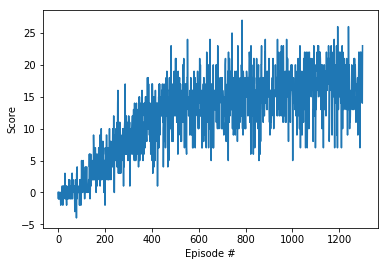

In [5]:
# plot the score for each episode vs. the episode number
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Finally, save the trained weights and close the environment down.

In [6]:
# save the trained weights and close the environment
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
env.close()

### 3. Implementation Details

If you have any questions about the implementation details of this project please refer to the **Report.pdf** file included with this repository for a full explanation of both the algorithms and design decisions chosen.